Скрипт формирует  файл с зашумлённым сигналом 
<<noise.wav>> из исходного <<sound.wav>> 
добавлением ВЧ-шума, затем фильтрует сигнал 
методом скользящего среднего и записывает 
результат в файл <<filter>>

Подключение необходимых библиотек

In [1]:
import scipy as sp;
import numpy as np;
import matplotlib.pyplot as plt;
import scipy.io.wavfile as wf

Параметры 

In [2]:
A=200; # Амплитуда шума
f0=5000; # Частота (начальная) шума
fn=10000; # Частота (конечная) шума
df=500; # Шаг изменения частоты шума
w=40; # Размер окна фильтра

Чтение звукового файла

In [3]:
rate,data=wf.read('ma/sound.wav');
# rate - частота дискретизации
# data - массив отсчётов сигнала
t=np.linspace(0,data.shape[0]/rate,data.shape[0]);
# t - значения области определения во временной области
f=np.linspace(0,2*rate,data.shape[0]);
# f - значения области определения в частотной области

График исходного сигнала
во временной и частотной областях

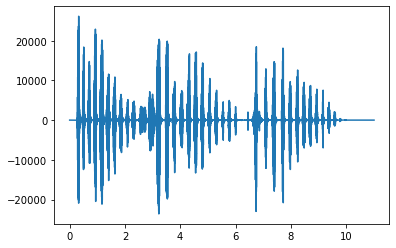

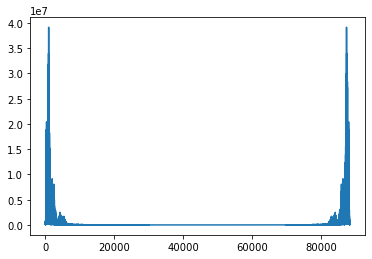

In [4]:
plt.plot(t,data[:,0]);
plt.show();
fdata=np.abs(sp.fft.fft(data[:,0]));
# fdata - массив отсчётов спектра сигнала
plt.plot(f,fdata);
plt.show();

Формирование высокочастотного шума

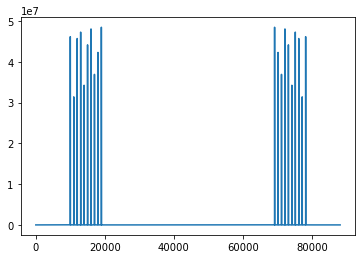

In [5]:
ny=np.zeros((data.shape[0],));
# ny - массив отсчётов шума
while f0<fn:
    ny=ny+A*np.sin(2*np.pi*t*f0);
    f0=f0+df;
# График спектра высокочастотного шума
fny=np.abs(sp.fft.fft(ny));
# fny - массив отсчётов спектра шума
plt.plot(f,fny);
plt.show();

Формирование зашумлённого сигнала

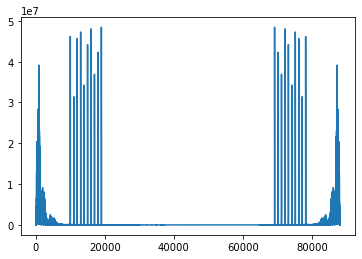

In [6]:
ndata=np.array(data);
ndata[:,0]=data[:,0]+ny;
ndata[:,1]=data[:,1]+ny;
# ndata - массив отсчётов зашумлённого сигнала стереоканала
fdata=np.abs(sp.fft.fft(ndata[:,0]));
# fny - массив отсчётов спектра зашумлённого сигнала
plt.plot(f,fdata);
plt.show();

Запись звукового файла c зашумлённым сигналом

In [7]:
wf.write('ma/noise.wav',rate,ndata);

Фильтрация сигнала
методом скользящего среднего

In [8]:
# Определение функции скользящего среднего
# a - массив данных
# n - размер окна
def moving_average(a,n=3):
    ret=np.cumsum(a,dtype=float);
    ret[n:]=ret[n:]-ret[:-n];
    return ret[n-1:]/n;

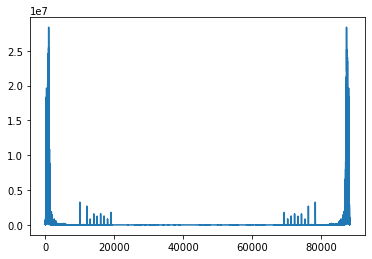

In [9]:
madata=np.array(ndata);
#madata=np.zeros((data.shape[0],2));
# madata - массив отсчётов отфильтрованного сигнала стереоканала
madata[1:ndata.shape[0]-w+2,0]=moving_average(ndata[:,0], w);
madata[1:ndata.shape[0]-w+2,1]=moving_average(ndata[:,1], w);
fmadata=np.abs(sp.fft.fft(madata[:,0]));
# fmadata - массив отсчётов спектра зашумлённого сигнала
f=np.linspace(0,2*rate,madata.shape[0]);
plt.plot(f,fmadata);
plt.show();

Запись звукового файла c отфильтрованным сигналом

In [10]:
wf.write('ma/filter.wav',rate,madata);